<a href="https://colab.research.google.com/github/rrahul2203/Deep-learning-Computer-Vision/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
%matplotlib inline

In [9]:
# from google.colab import files
# files.upload()

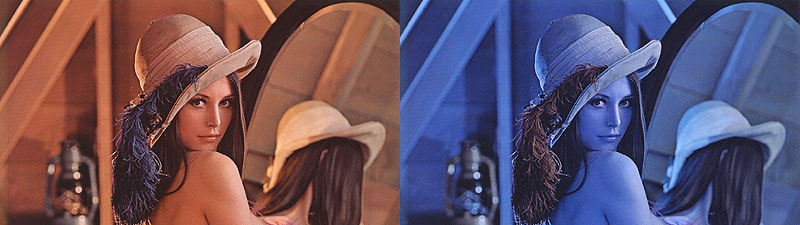

In [10]:
#Read the images in BRG mode
image = cv.imread('lena.jpg')
image2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
### For hconcat the image should be of same size
cv2_imshow(cv.hconcat([image, image2]))

In [11]:
### Print the shape of image
print("Image's shape: ", image.shape)

### Print the type
print("Image type", image.dtype)

### Print the image 
print(image)

Image's shape:  (225, 400, 3)
Image type uint8
[[[ 53  70 109]
  [ 53  70 109]
  [ 52  69 108]
  ...
  [ 44  42  54]
  [ 50  48  60]
  [ 57  55  67]]

 [[ 56  73 112]
  [ 55  72 111]
  [ 51  68 107]
  ...
  [ 42  40  52]
  [ 45  43  55]
  [ 51  49  61]]

 [[ 55  72 111]
  [ 54  71 110]
  [ 51  68 107]
  ...
  [ 41  39  51]
  [ 44  42  54]
  [ 50  48  60]]

 ...

 [[ 54  75 130]
  [ 50  73 129]
  [ 54  77 133]
  ...
  [ 63  76 122]
  [ 62  75 119]
  [ 68  81 125]]

 [[ 50  74 128]
  [ 48  71 127]
  [ 53  76 132]
  ...
  [ 66  79 125]
  [ 62  75 119]
  [ 66  79 123]]

 [[ 51  72 133]
  [ 50  72 130]
  [ 51  70 127]
  ...
  [ 72  86 139]
  [ 64  80 133]
  [ 69  84 140]]]


Shape (225, 400)


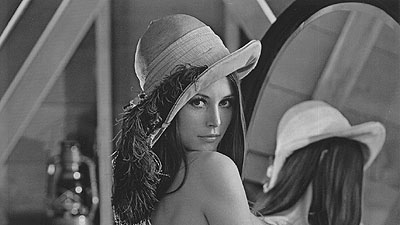

In [12]:
###Read the image in grayscale
gray_image = cv.imread('lena.jpg', cv.IMREAD_GRAYSCALE)
print("Shape", gray_image.shape)
cv2_imshow(gray_image)

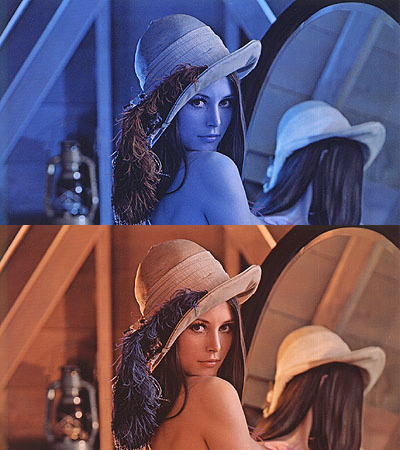

(225, 400, 3)


In [13]:
##Read image using sklearn io 
sklearn_io = io.imread('lena.jpg') ##Reads the image in RGB mode
cvt_image = cv.cvtColor(sklearn_io, cv.COLOR_RGB2BGR)
cv2_imshow(cv.vconcat([sklearn_io, cvt_image]))

print(cvt_image.shape)

In [14]:
#Read the image using PIL
pil_im = Image.open('lena.jpg') ##Reads the image in BGR mode

#pil_im.show()
print("Image Size: ", pil_im.size)

#image to array
img_arr = np.array(pil_im)
print("Shape of image: ", img_arr.shape)

Image Size:  (400, 225)
Shape of image:  (225, 400, 3)


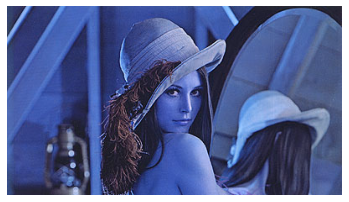

In [15]:
##Display image using matplotlib
img = cv.imread('lena.jpg') ##Reads the image in BGR format
imgplot = plt.imshow(img) ##Displays the image in RGB format
plt.axis('off')
plt.show()

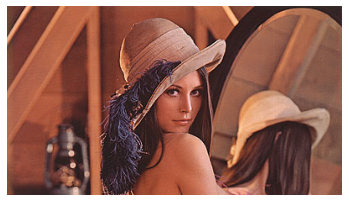

In [16]:
##To correct the above display
correct_imgplot = plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

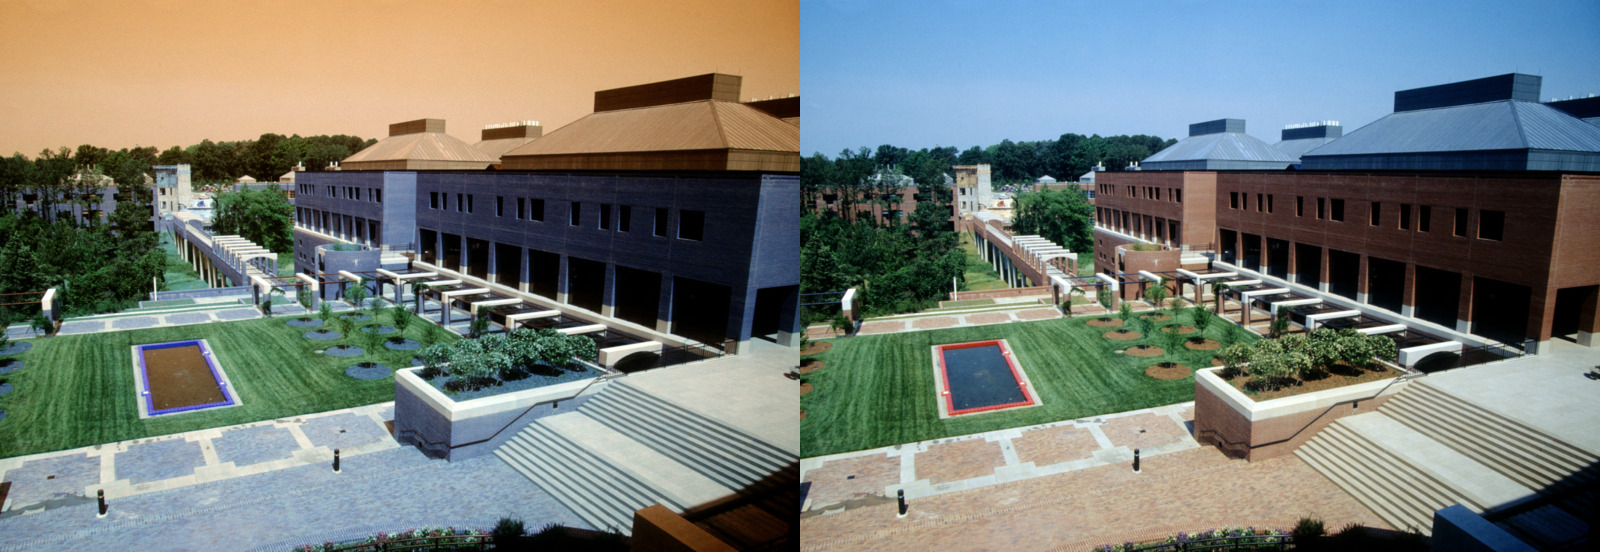

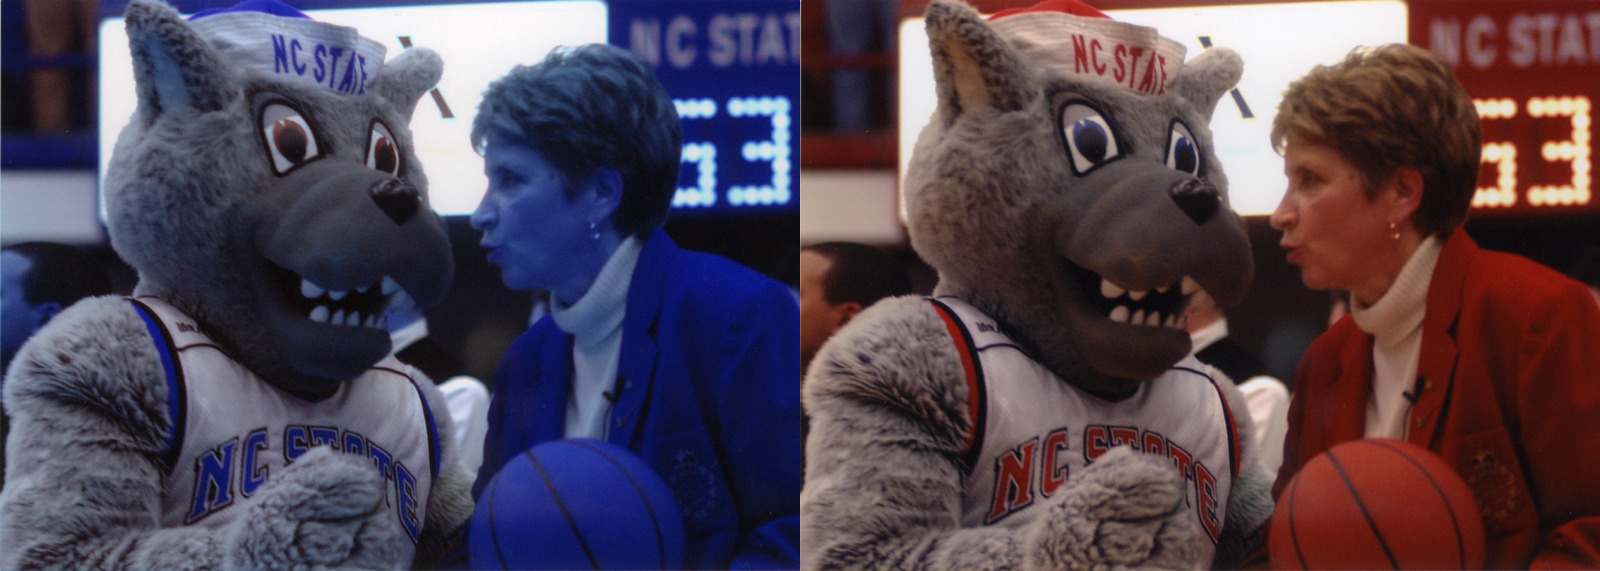

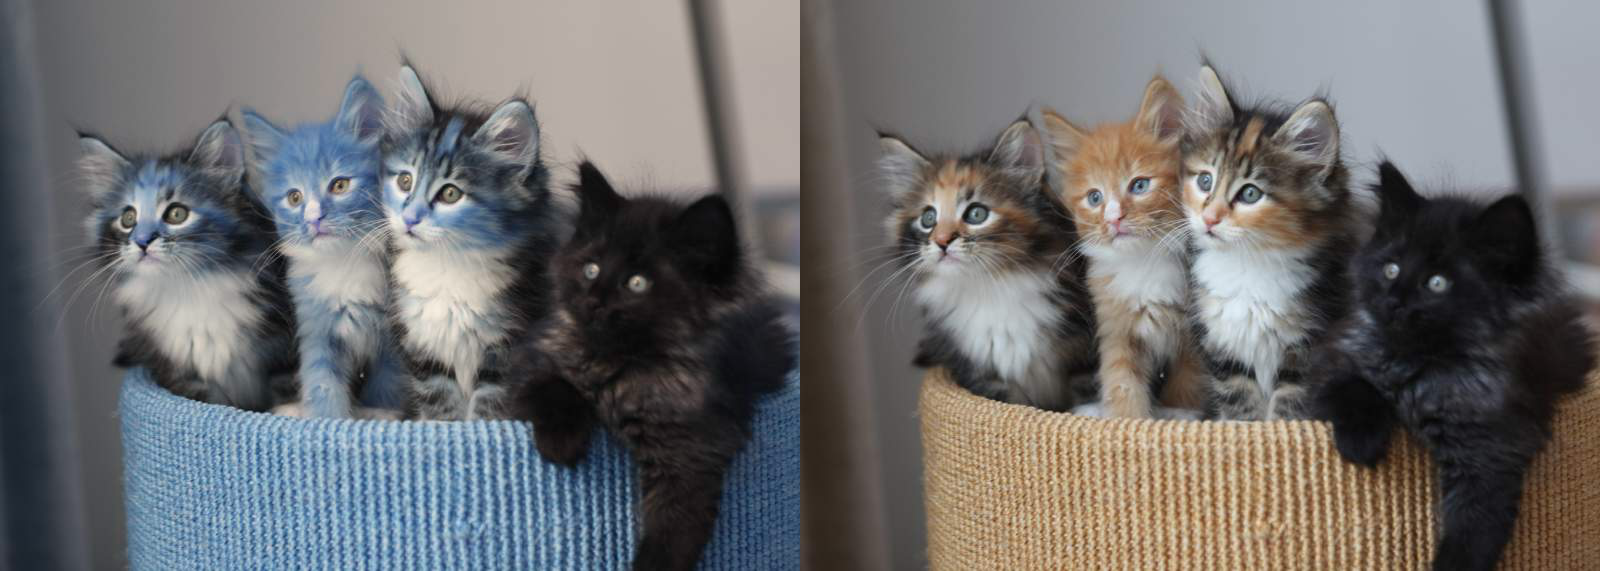

In [17]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  ##sklearn io reads image in RGB format
  img = io.imread(url)
  img2 = cv.cvtColor(img, cv.COLOR_RGB2BGR)
  final_image = cv.hconcat((img, img2))
  cv2_imshow(final_image)

###Histogram Calculation


---
Command: ***cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])***

1. images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
2. channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
3. mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
4. histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
5. ranges : this is our RANGE. Normally, it is [0,256].


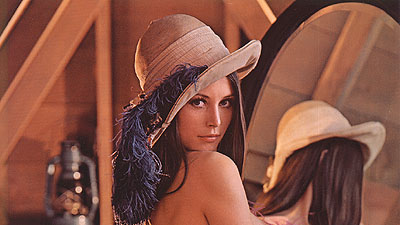

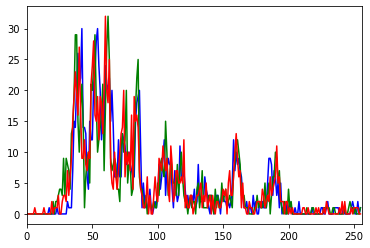

In [18]:
img = cv.imread('lena.jpg')
cv2_imshow(img)

##Calculating the histogran using cv.calcHist function
color = ('b', 'g', 'r')
for i, col in enumerate(color):
  hist = cv.calcHist(img, [i], None, [256], [0, 256])
  plt.plot(hist, color=col)
  plt.xlim([0, 256])
plt.show()



## command: ***numpy.histogram(a, bins=10, range=None, density=None, weights=None)***
a : array_like
### source: https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

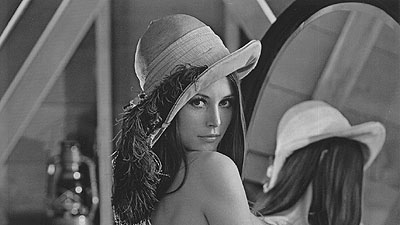

In [19]:
## Calculate the histogram using np.histogram
img = cv.imread('lena.jpg', 0)
cv2_imshow(img)

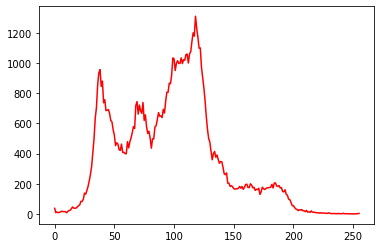

In [20]:
hist, bins = np.histogram(img.ravel(), bins=256, range=[0,256])
plt.plot(hist, color='r')
plt.show()

***Application of Mask***

---
**cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

Create a mask image with white color on the region we want to find histogram and black otherwise. Then pass this as the mask.

(225, 400)


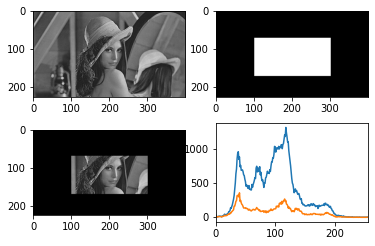

In [21]:
img = cv.imread('lena.jpg', cv.IMREAD_GRAYSCALE)
print(img.shape)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[70:170, 100:300] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)


# Calculate histogram with mask and without mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

## Histogram Equalization

---
https://docs.opencv.org/3.4/d5/daf/tutorial_py_histogram_equalization.html

Theory:

Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So we need to stretch this histogram to either ends. This normally improves the contrast of the image.

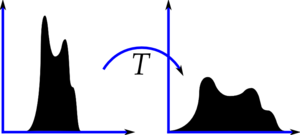

(683, 1024)


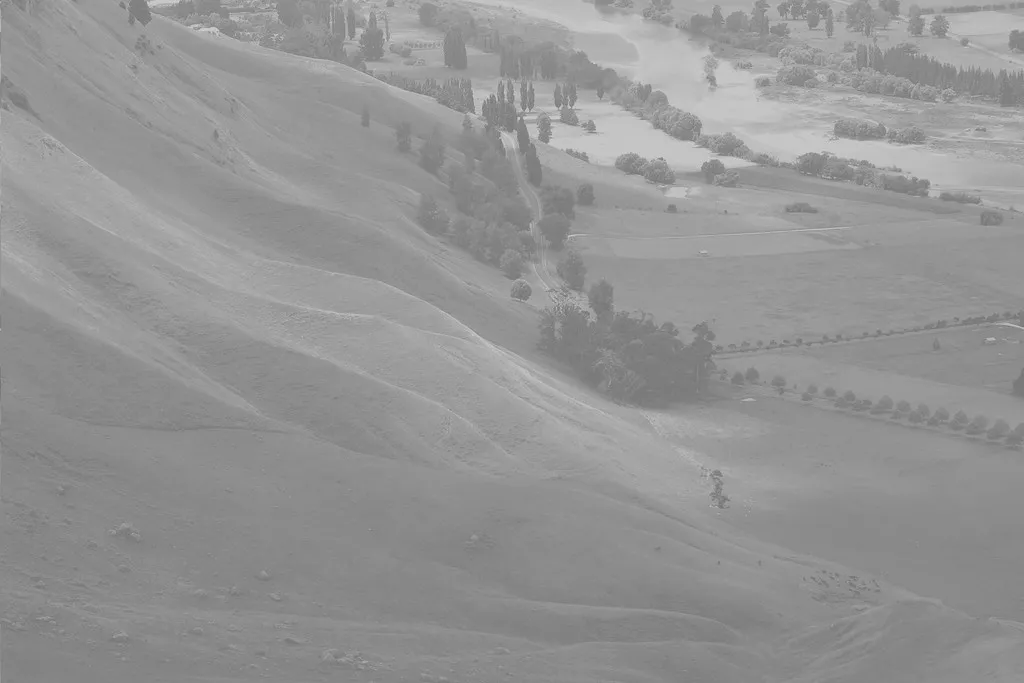

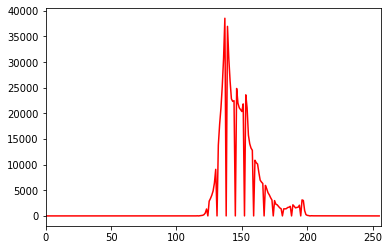

In [22]:
img = cv.imread('before_equalization.jpg', 0)
print(img.shape)

# scale_percent = 40 # percent of original size
# width = int(img.shape[1] * scale_percent / 100)
# height = int(img.shape[0] * scale_percent / 100)
# dim = (width, height)
# img = cv.resize(img, dim, interpolation = cv.INTER_AREA)

cv2_imshow(img)
hist = cv.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='r')
plt.xlim([0,256])
plt.show()

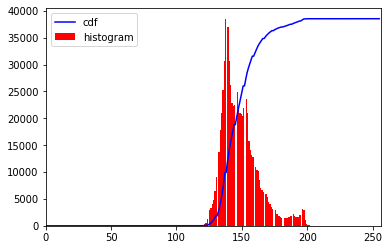

In [23]:
hist, bin = np.histogram(img.ravel(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

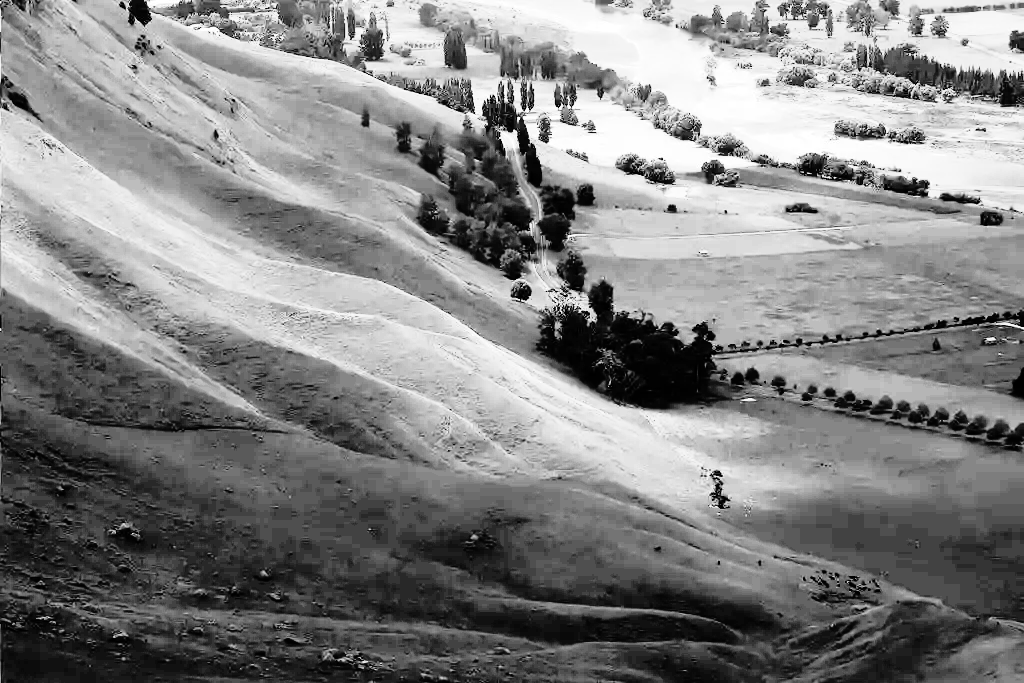

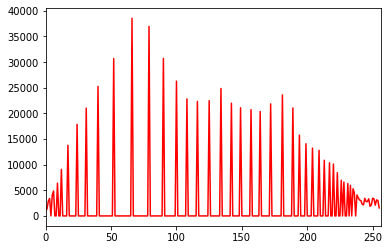

In [24]:
##Histogram Equalization
equalized_image = cv.equalizeHist(img)
cv2_imshow(equalized_image)
hist = cv.calcHist([equalized_image], [0], None, [256], [0, 256])
plt.plot(hist, color='r')
plt.xlim([0,256])
plt.show()

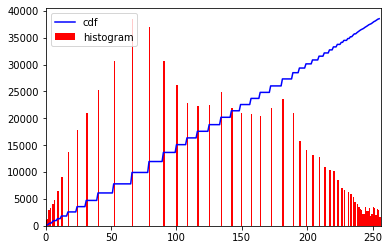

In [25]:
##Histogram for histogram equalized image
hist, bin = np.histogram(equalized_image.ravel(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equalized_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Histogram equalization is good when histogram of the image is confined to a particular region. It won't work good in places where there is large intensity variations where histogram covers a large region, ie both bright and dark pixels are present. 

1. <a href="https://stackoverflow.com/questions/10549245/how-can-i-adjust-contrast-in-opencv-in-c">How can I adjust contrast in OpenCV in C?</a>

2. <a href="https://stackoverflow.com/questions/10561222/how-do-i-equalize-contrast-brightness-of-images-using-opencv">How do I equalize contrast & brightness of images using opencv?</a>


(683, 1024, 3)


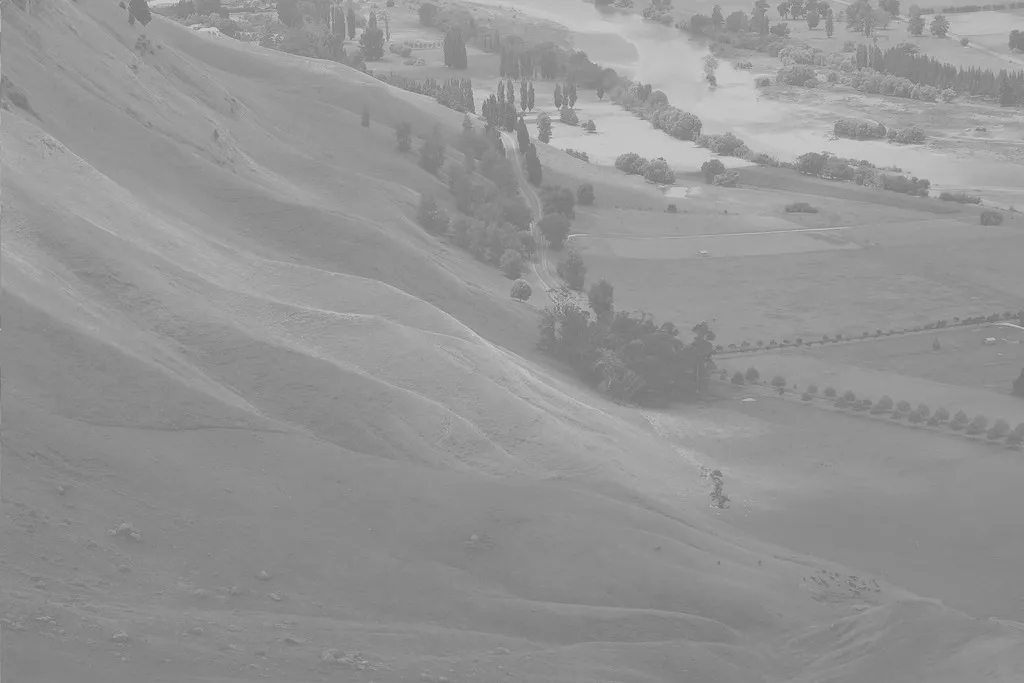

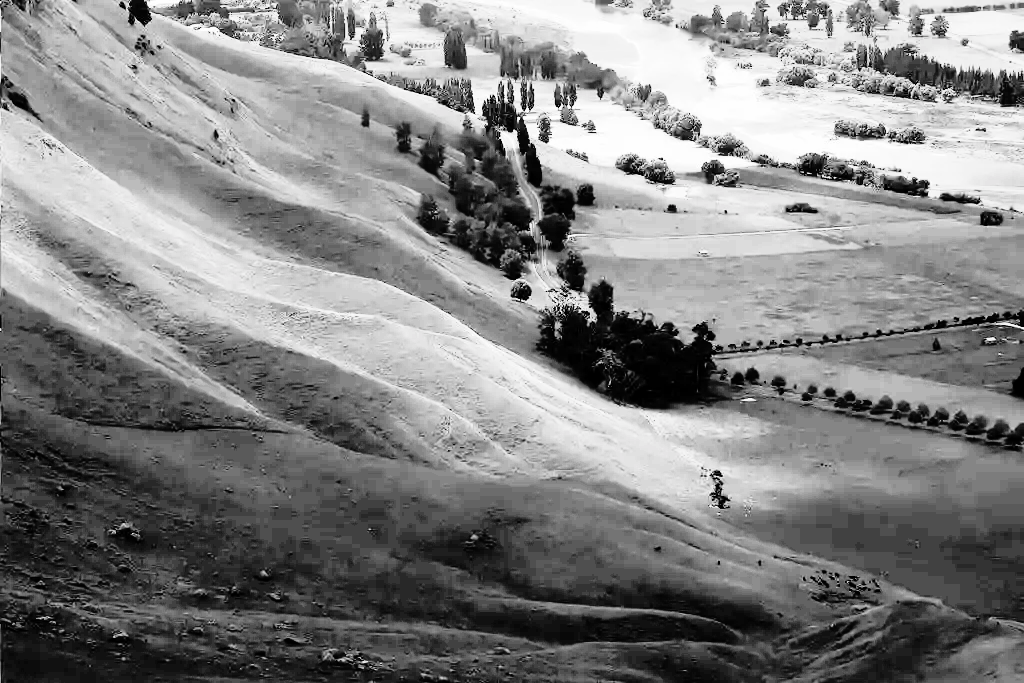

In [27]:
######################################
# READ IMAGE FROM FILE
######################################
img = cv.imread('before_equalization.jpg')
print(img.shape)
cv2_imshow(img)



######################################
# PERFORM HISTOGRAM EQUALIZATION
######################################

"""
STEP 1: Normalized cumulative histogram
"""
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img.flatten(), minlength=256)

#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)


"""
STEP 2: Pixel mapping lookup table
"""
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)


"""
STEP 3: Transformation
"""
# flatten image array into 1D list
img_list = list(img.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img.shape)

cv2_imshow(eq_img_array)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

---



CLAHE (Contrast Limited Adaptive Histogram Equalization) is an algorithm for enhancing local contrast in images, and is frequently used in application areas like underwater photography, traffic control, astronomy, and medical imaging.

CLAHE can also be used in the tone mapping operation of displaying a HDR (High Dynamic Range) image.

HE, AHE, and CLAHE
Histogram equalization (HE) is a method in image processing of contrast adjustment using the image's histogram. This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast.

Adaptive histogram equalization (AHE) differs from ordinary histogram equalization in the respect that the adaptive method computes several histograms, each corresponding to a distinct section of the image, and uses them to redistribute the lightness values of the image. It is therefore suitable for improving the local contrast and enhancing the definitions of edges in each region of an image.

AHE has a tendency to overamplify noise in relatively homogeneous regions of an image. A variant of adaptive histogram equalization called contrast limited adaptive histogram equalization (CLAHE) prevents this by limiting the amplification.
